# 🌎World 👨‍👨‍👧‍👦Population 📈Analysis using Plotly

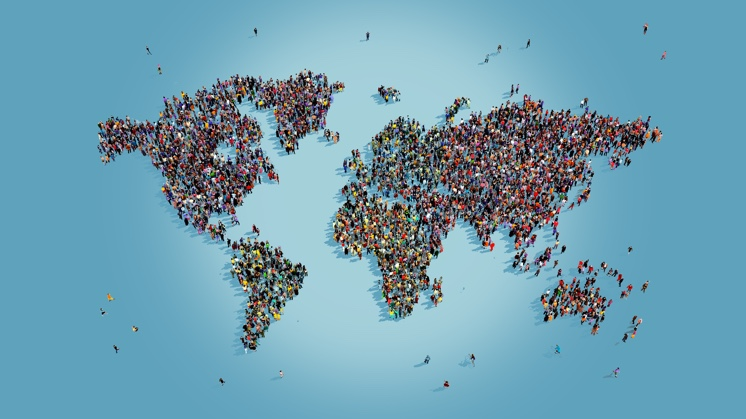

## Introduction
The worlds population is **7.97 billion** as of September 2022 and it's getting increase day by day. The purpose of this study is take look at the population change of the world through the years of 1970 - 2022. We'll check the distribution of the population among the continents and change of the space that every person has in time. While doing this we'll get familiar with the different usage of Plotly Express. 

---
**Refrences:**
1. https://www.kaggle.com/code/coteli/world-population - for theme usage 
2. https://www.kaggle.com/code/jrmistry/plotly-how-to-change-plot-data-using-dropdowns - for dropdown implementation to the line plot


# Import Libraries

In [43]:
import numpy as np 
import pandas as pd

# For plotting
import plotly.express as px
# For multie plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from plotly import tools
import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.io as pio # Plotly theming
pio.templates.default = 'plotly_white'
pio.templates["plotly_white"] = go.layout.Template(
    layout=go.Layout(
        colorway=px.colors.qualitative.Set2,
        title_font_color="#333333"
    )
)

# Loading Dataset

In [2]:
df = pd.read_csv('Data/world_population.csv')
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


# Preparing Dataset

In [3]:
# Dropping the features that we'll not use
df = df.drop(['Rank', 'CCA3', 'Capital'], axis='columns')
df.head()

,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
# Renaming the year columns for easier use
for col in df.columns:
    if 'Population' and '0' in col:
        df = df.rename(columns={col: col.split(' ')[0]})
        
df.head()

,Country,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


# Analysis

In [6]:
# Overall population change of the world
pop_columns = ['2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970']
df_total = df[pop_columns].sum(axis=0)
df_total = df_total.reset_index()
df_total.columns = ['Year', 'Total World Population']
df_total = df_total.reindex(index=df_total.index[::-1]) # to get the 1970 at the top of the dataframe
df_total.head()

,Year,Total World Population
7,1970,3694136661
6,1980,4442400371
5,1990,5314191665
4,2000,6147055703
3,2010,6983784998


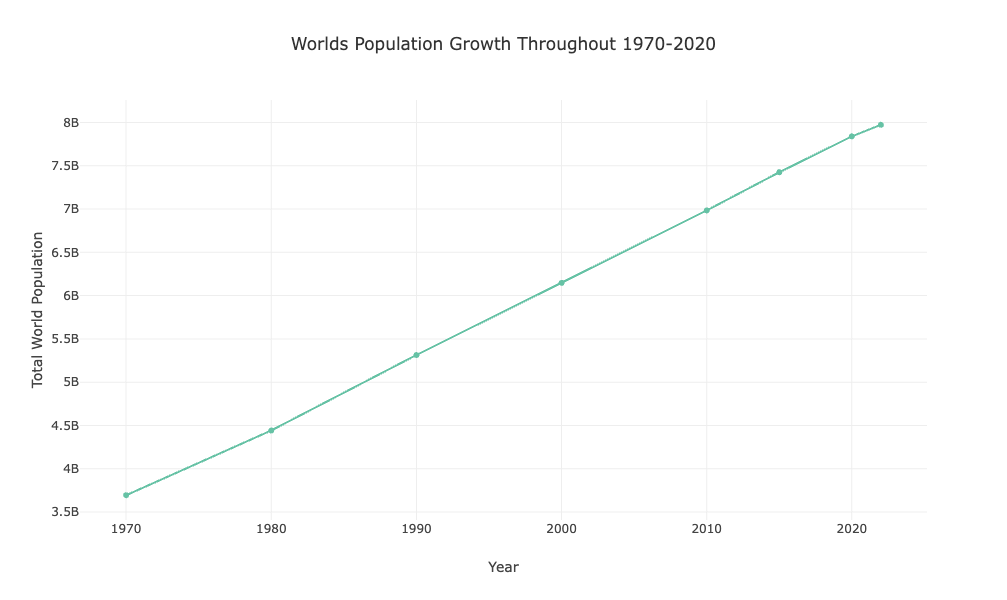

In [8]:
fig = px.line(df_total, x='Year', y='Total World Population', markers=True, 
              title='World''s Population Growth Throughout 1970-2020', 
              width=1000, height=600)
fig.show()

**🔎 Observation:** The growth rate between 1970 and 2010 is very high and starts slowing down from that point on.

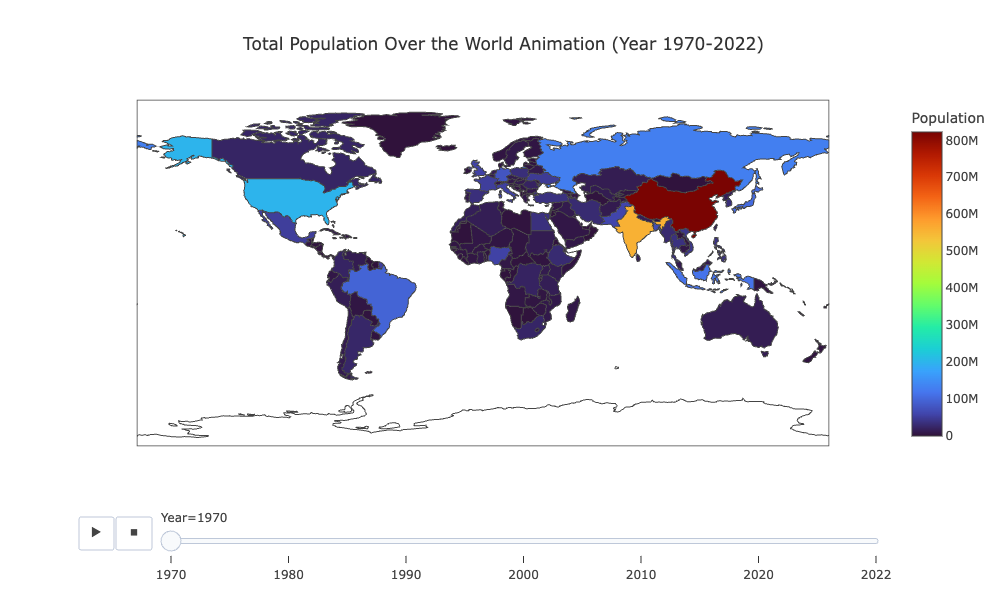

In [9]:
# Adjusting the dataframe to display the changes on world map
df_pop = df.melt(id_vars=['Country'], value_vars=['2022', '2020', '2010', '2000', '1990', '1980', '1970'], 
              var_name='Year', value_name='Population')
df_pop = df_pop.sort_values('Year')


fig = px.choropleth(df_pop, 
              locations = 'Country',
              color="Population", 
              animation_frame="Year",
              color_continuous_scale='Turbo',
              locationmode='country names',
              title='Total Population Over the World Animation (Year 1970-2022)',
              height=600
             )
fig.show()

## Analysis at Continent Level

In [60]:
df_continent = df.groupby(by='Continent').sum()
df_continent.head()

,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,
Africa,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33
North America,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606,24244178,10910.4703,40.1670,7.51
Oceania,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270,8515081,3048.4905,23.1698,0.55


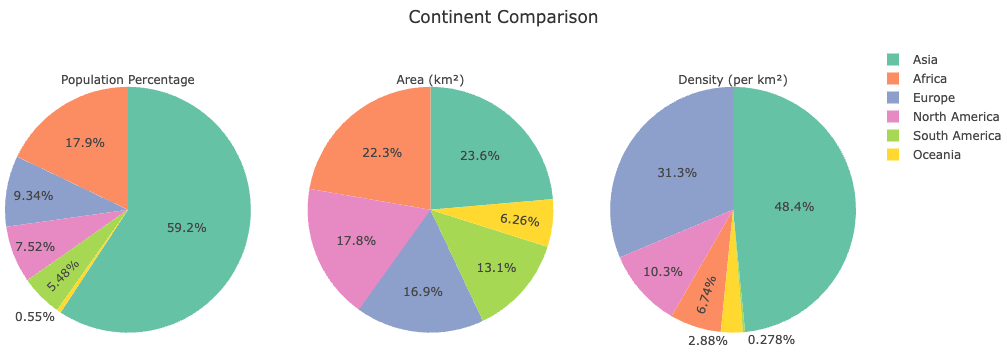

In [11]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_continent.index, 
                     values=df_continent['World Population Percentage'], 
                     title="Population Percentage"), 1, 1)
fig.add_trace(go.Pie(labels=df_continent.index, 
                     values=df_continent['Area (km²)'], 
                     title="Area (km²)"), 1, 2)
fig.add_trace(go.Pie(labels=df_continent.index, 
                     values=df_continent['Density (per km²)'], 
                     title="Density (per km²)"), 1, 3)

fig.update_traces(hoverinfo="label+percent")
fig.update_layout(title_text="Continent Comparison", margin=dict(t=45, b=0, l=5, r=0))
fig.show()

**🔎 Observation:** Eventhough Asia has only 23% of the surface area of World, it has the 59% of the total population which creates the highest population density in the World with 48%. The second population density in Europe with 31%.

In [53]:
df_asia = df.query("Continent == 'Asia'").drop('Continent', axis=1)
df_asia.head()

,Country,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
9,Armenia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03
13,Azerbaijan,10358074,10284951,9863480,9237202,8190337,7427836,6383060,5425317,86600,119.6082,1.0044,0.13
15,Bahrain,1472233,1477469,1362142,1213645,711442,517418,362595,222555,765,1924.4876,1.0061,0.02
16,Bangladesh,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15


In [54]:
top10_asia = df_asia.sort_values(by='2022', ascending=False).head(10)
top10_asia

,Country,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,China,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,India,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
93,Indonesia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,Pakistan,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
16,Bangladesh,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
102,Japan,123951692,125244761,127250933,128105431,126803861,123686321,117624196,105416839,377930,327.9753,0.9947,1.55
163,Philippines,115559009,112190977,103031365,94636700,77958223,61558898,48419546,37435586,342353,337.5434,1.0147,1.45
228,Vietnam,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.0074,1.23
94,Iran,88550570,87290193,81790841,75373855,65544383,55793629,38520664,28449705,1648195,53.7258,1.0071,1.11
213,Turkey,85341241,84135428,79646178,73195345,64113547,54324142,44089069,35540990,783562,108.9145,1.0067,1.07


In [56]:
df_europe = df.query("Continent == 'Europe'").drop('Continent', axis=1)
df_europe.head()

,Country,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
1,Albania,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
4,Andorra,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
12,Austria,8939617,8907777,8642421,8362829,8010428,7678729,7547561,7465301,83871,106.5877,1.0020,0.11
18,Belarus,9534954,9633740,9700609,9731427,10256483,10428525,9817257,9170786,207600,45.9295,0.9955,0.12
19,Belgium,11655930,11561717,11248303,10877947,10264343,9959560,9828986,9629376,30528,381.8111,1.0038,0.15


In [57]:
top10_europe = df_europe.sort_values(by='2022', ascending=False).head(10)
top10_europe

,Country,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
171,Russia,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
74,Germany,83369843,83328988,82073226,81325090,81551677,79370196,77786703,78294583,357114,233.4544,0.9995,1.05
220,United Kingdom,67508936,67059474,65224364,62760039,58850043,57210442,56326328,55650166,242900,277.9289,1.0034,0.85
68,France,64626628,64480053,63809769,62444567,58665453,56412897,53713830,50523586,551695,117.1419,1.0015,0.81
99,Italy,59037474,59500579,60232906,59822450,56966397,56756561,56329482,53324036,301336,195.9191,0.9966,0.74
196,Spain,47558630,47363807,46431342,46572772,40741651,38889889,37491666,33792617,505992,93.9909,1.0015,0.60
164,Poland,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50
218,Ukraine,39701739,43909666,44982564,45683020,48879755,51589817,49973920,47279086,603500,65.7858,0.9120,0.50
170,Romania,19659267,19442038,19906079,20335211,21919876,22836234,22125224,19922618,238391,82.4665,1.0171,0.25
144,Netherlands,17564014,17434557,17041107,16617116,15899135,14944548,14130387,13037686,41850,419.6897,1.0036,0.22


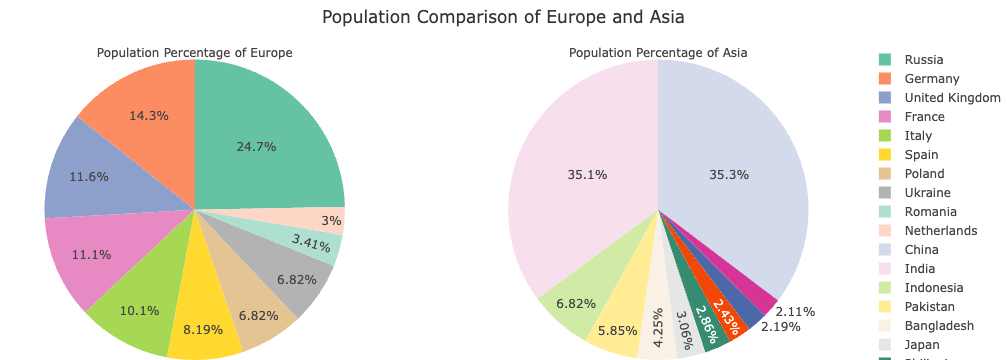

In [59]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=top10_europe['Country'], 
                     values=top10_europe['World Population Percentage'], 
                     title="Population Percentage of Europe"), 1, 1)
fig.add_trace(go.Pie(labels=top10_asia['Country'], 
                     values=top10_asia['World Population Percentage'], 
                     title="Population Percentage of Asia"), 1, 2)

fig.update_traces(hoverinfo="label+percent")
fig.update_layout(title_text="Population Comparison of Europe and Asia", margin=dict(t=45, b=0, l=5, r=0))
fig.show()

**🔎 Observation:** As it can be seen on the density pie chart on the Continent Comparison, Asia and Europe are the highest density continent in the world. When we check the top 10 populated countries of these continents the distribution in Europe seems more balanced than Asia. Almost 70% of the world population lives in Idnia and China (Asia) in 40% space on the World.

In [12]:
df_continent = df_continent.reset_index()
df_continent = df_continent.drop(['Area (km²)', 'Density (per km²)', 'Growth Rate', 
                                          'World Population Percentage'], axis=1).set_index('Continent')
df_continent.index.names = ['Year']

df_continent = df_continent.T
df_continent.head()

Year,Africa,Asia,Europe,North America,Oceania,South America
2022,1426730932,4721383274,743147538,600296136,45038554,436816608
2020,1360671810,4663086535,745792196,594236593,43933426,431530043
2015,1201102442,4458250182,741535608,570383850,40403283,413134396
2010,1055228072,4220041327,735613934,542720651,37102764,393078250
2000,818946032,3735089604,726093423,486069584,31222778,349634282


In [15]:
def multi_plot(df, addAll = True):
    fig = go.Figure()

    for column in df.columns.to_list():
        fig.add_trace(
            go.Scatter(
                x = df.index,
                y = df[column],
                name = column
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
        title='Population Change of the Continents from 1970 to 2022', height=800)
    
    fig.show()

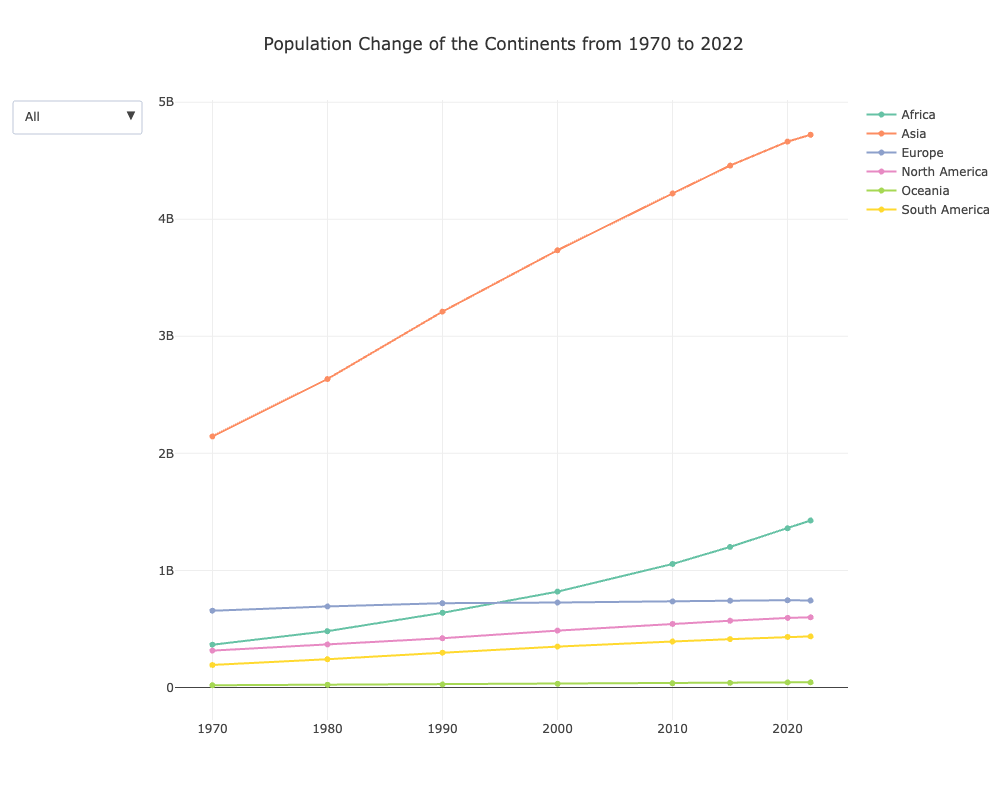

In [16]:
multi_plot(df_continent)

**🔎 Observation:** It can be seen that the fastest groth rate is in Asia continent and it's follwed by Africa. If Africa is selected from the dropdown, it's noticed that the growth rate of Africa increased in the last decade. On the other hand Asia's slows down. North and South America follows a similar pattern to Asia. It's obvious that the population growth of Europe slows down since 1990. An important point for this continent is the population is <ins>decreases</ins> for the last 2 years. It might be an impact of the out break of the novel Corona Virus.

## Analysis at Country Level

In [50]:
top10 = df.sort_values('2022', ascending=False).head(10)
top10 = top10.melt(id_vars=['Country', 'Area (km²)'], value_vars=['1970', '1980', '1990', '2000', '2010', '2020', '2022'], 
                   var_name='Year', value_name='Population')
top10['Density'] = (top10['Population'] / top10['Area (km²)']) 
top10.head()

,Country,Area (km²),Year,Population,Density
0,China,9706961,1970,822534450,84.736557
1,India,3287590,1970,557501301,169.577502
2,United States,9372610,1970,200328340,21.373805
3,Indonesia,1904569,1970,115228394,60.501034
4,Pakistan,881912,1970,59290872,67.229919


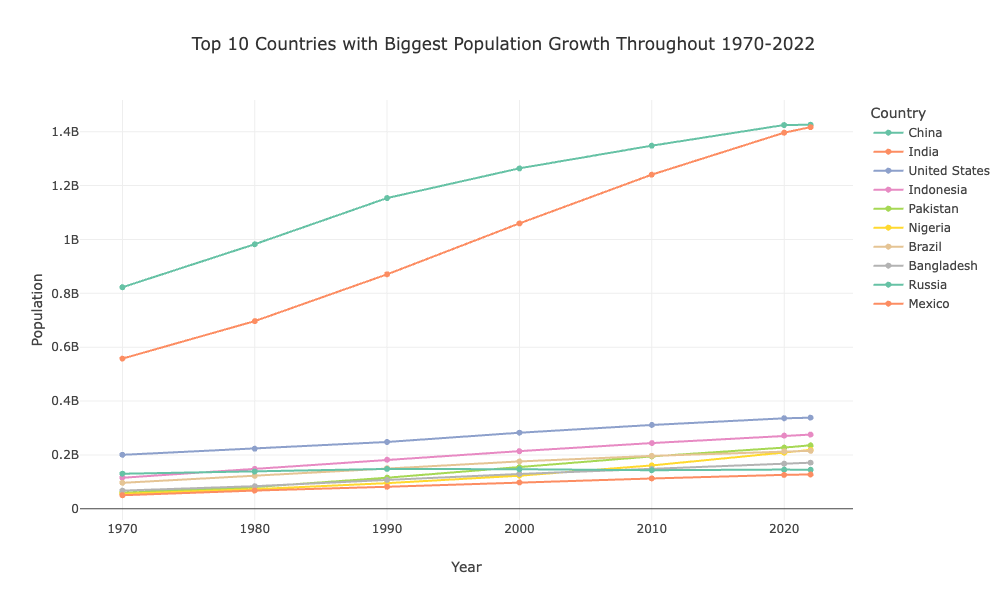

In [48]:
fig = px.line(top10, x='Year', y='Population', color='Country', markers=True, 
              title='Top 10 Countries with Biggest Population Growth Throughout 1970-2022', 
              width=1000, height=600)
fig.show()

**🔎 Observation:** China and India are the top 2 countries with the highest population as expected. US is the third in the list with almost 1/4 of India. Above graph also shows that how fast the population changes. while US's population increases only 50%, <ins>China doubles and India triples</ins> their population within the last 50 years.

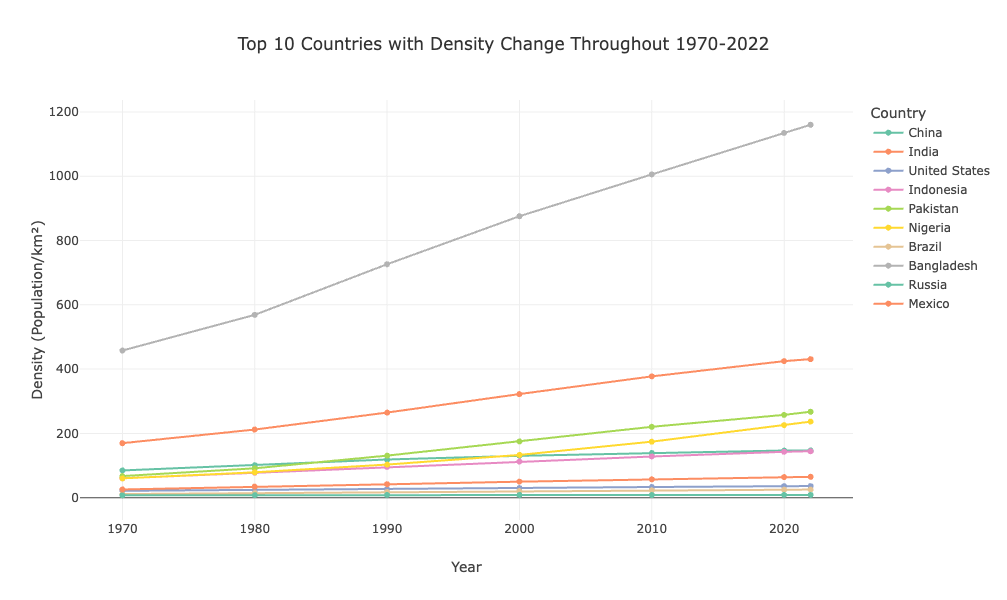

In [52]:
fig = px.line(top10, x='Year', y='Density', color='Country', markers=True, 
              title='Top 10 Countries with Density Change Throughout 1970-2022', 
              width=1000, height=600, labels={'Density':'Density (Population/km²)'})
fig.show()

**🔎 Observation:** Bangladesh is the most crowded country per km<sup>2</sup> and it is 3 times more crowded than India which is the second most crowded country. Pakistan has the third place with the half of India.

In [20]:
least10 = df.sort_values('2022', ascending=True).head(10)
least10 = least10.melt(id_vars=['Country', 'Area (km²)'], value_vars=['1970', '1980', '1990', '2000', '2010', '2020', '2022'], 
                   var_name='Year', value_name='Population')
least10['Space'] = (least10['Area (km²)'] / top10['Population']) * 1000000 
least10.head()

,Country,Area (km²),Year,Population,Space
0,Vatican City,1,1970,752,0.001216
1,Tokelau,12,1970,1714,0.021525
2,Niue,260,1970,5185,1.297869
3,Falkland Islands,12173,1970,2274,105.642365
4,Montserrat,102,1970,11402,1.720332


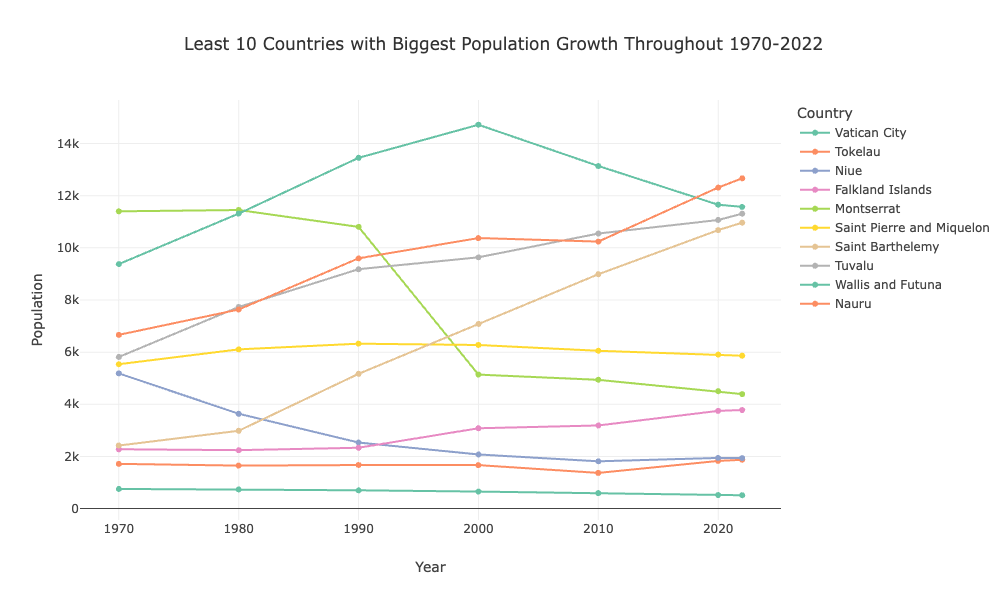

In [26]:
fig = px.line(least10, x='Year', y='Population', color='Country', markers=True, 
              title='Least 10 Countries with Biggest Population Growth Throughout 1970-2022', 
              width=1000, height=600)
fig.show()